# Tarea 6 - Jose Adrian Castillo Sierra - 1664207
# Luis Enrique López Nerio 1487280

Para la realizacion de esta tarea se realiza la clasificacion de vegetales utilizando 3 tecnicas diferentes con el fin de poder comparar las tecnicas y resultados obtenidos

## Arquitectura basada en AlexNet

In [1]:
import os

import tensorflow as tf
from tensorflow import keras
import argparse
from imutils import paths
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


import glob

from tensorflow.keras import backend as K
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns

Primero definimos algunos constantes como los tamaños de las imagenes, epochs y directorio base de las imagenes

In [3]:
Hg = 150
Lng = 150

INIT_LR = 0
BS = 16
EPOCHS = 20

BASE_DIR = '.\\Vegetable Images'

Utilizando ImageDataGenerator de keras cargamos los datos de entrenamiento y de validacion

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_flow = train_datagen.flow_from_directory(BASE_DIR + '\\train', target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')

Found 15001 images belonging to 15 classes.


In [4]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen_flow = valid_datagen.flow_from_directory(BASE_DIR + '\\validation', target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')

Found 3000 images belonging to 15 classes.


Definimos una arquitectura de Red Neuronal con base a la de Alexnet

In [33]:
model = Sequential()
model.add(Conv2D(15, (11, 11), input_shape=(Lng, Hg, 3),
        padding='same', kernel_regularizer=l2(INIT_LR)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(36, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(15))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['acc', 'AUC'], optimizer='adam')
H = model.fit(train_datagen_flow, validation_data=valid_datagen_flow, steps_per_epoch=len(train_datagen_flow), 
          validation_steps=len(valid_datagen_flow), epochs=EPOCHS, verbose=2)

model.save('model.h5')

Epoch 1/20
938/938 - 33s - loss: 1.4252 - acc: 0.5790 - auc: 0.9204 - val_loss: 0.9999 - val_acc: 0.7097 - val_auc: 0.9508 - 33s/epoch - 36ms/step
Epoch 2/20
938/938 - 28s - loss: 0.8739 - acc: 0.7577 - auc: 0.9684 - val_loss: 1.7565 - val_acc: 0.5283 - val_auc: 0.8603 - 28s/epoch - 29ms/step
Epoch 3/20
938/938 - 27s - loss: 0.6844 - acc: 0.8141 - auc: 0.9738 - val_loss: 0.6857 - val_acc: 0.8027 - val_auc: 0.9686 - 27s/epoch - 29ms/step
Epoch 4/20
938/938 - 27s - loss: 0.5489 - acc: 0.8525 - auc: 0.9719 - val_loss: 0.6714 - val_acc: 0.7867 - val_auc: 0.9418 - 27s/epoch - 29ms/step
Epoch 5/20
938/938 - 28s - loss: 0.4544 - acc: 0.8840 - auc: 0.9682 - val_loss: 0.5971 - val_acc: 0.8187 - val_auc: 0.9194 - 28s/epoch - 30ms/step
Epoch 6/20
938/938 - 29s - loss: 0.3722 - acc: 0.9091 - auc: 0.9672 - val_loss: 0.9122 - val_acc: 0.7397 - val_auc: 0.8857 - 29s/epoch - 31ms/step
Epoch 7/20
938/938 - 28s - loss: 0.3066 - acc: 0.9294 - auc: 0.9665 - val_loss: 0.9596 - val_acc: 0.7227 - val_auc: 0.

Mostramos las curvas de precision y de perdida a lo largo de los epochs.

Algo que se puede notar es como poco a poco el acurracy va en aumento al igual que la perdida se reduce.

In [10]:
def plot_accuracy(history):
    
    plt.plot(history.history['acc'],label='train accuracy')
    plt.plot(history.history['val_acc'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(H)
plot_loss(H)

NameError: name 'H' is not defined

In [10]:
K.clear_session()
path_to_model='./model.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


En base al modelo generado vamos a compararlo con los datos de validacion. Para esto leeremos las imagenes de validacion y finalmente veremos el resultado final en una matriz de confusion.

In [14]:
validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    BASE_DIR + '\\validation',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 3000 images belonging to 15 classes.


C:\Users\Adrian\AppData\Local\Temp\ipykernel_26028\662446566.py:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(validation_generator)


Test Accuracy: 0.989


In [23]:
category={
    0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3 : 'Brinjal', 4: "Broccoli", 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower',
    9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13 : "Radish", 14: "Tomato"
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(150, 150))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('\\')[-1]
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(150, 150))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
                
        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

In [19]:
validation_folder = BASE_DIR + '\\validation'
for i in os.listdir(validation_folder):
    predict_dir(os.path.join(validation_folder,i),model)

Accuracy for Bean: 0.99 (198/200)
Accuracy for Bitter_Gourd: 1.00 (200/200)
Accuracy for Bottle_Gourd: 1.00 (200/200)
Accuracy for Brinjal: 0.98 (197/200)
Accuracy for Broccoli: 0.96 (193/200)
Accuracy for Cabbage: 1.00 (200/200)
Accuracy for Capsicum: 1.00 (200/200)
Accuracy for Carrot: 0.99 (199/200)
Accuracy for Cauliflower: 0.99 (198/200)
Accuracy for Cucumber: 0.99 (199/200)
Accuracy for Papaya: 0.98 (197/200)
Accuracy for Potato: 1.00 (200/200)
Accuracy for Pumpkin: 0.95 (191/200)
Accuracy for Radish: 0.99 (199/200)
Accuracy for Tomato: 0.98 (197/200)


In [20]:
def labels_confusion_matrix(validation_folder):
    
    folder_path=validation_folder
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        true=true.split('\\')[-1]
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(150,150))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="turbo"
    cm_plot_labels = [i for i in range(15)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [26]:
y_true,y_pred=labels_confusion_matrix(validation_folder)

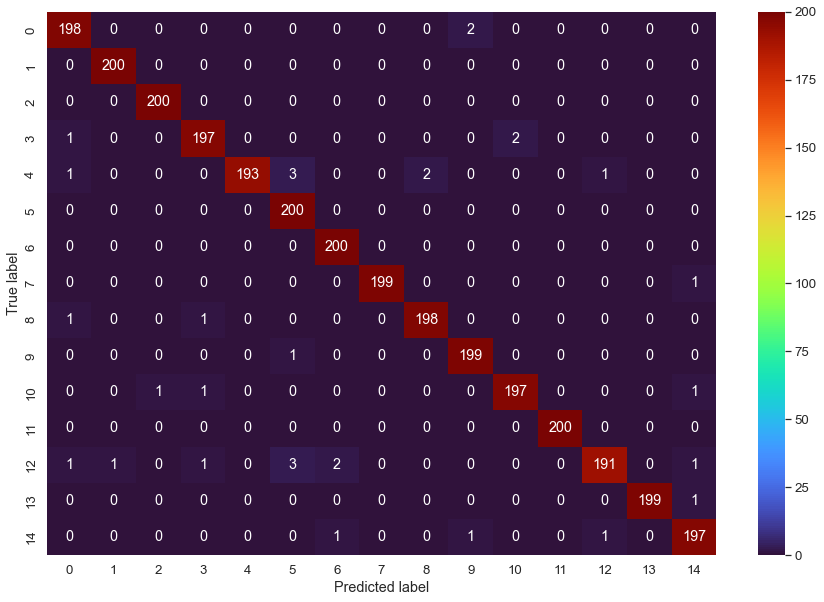

In [27]:
print_confusion_matrix(y_true,y_pred)

In [32]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

np.count_nonzero(y_pred == y_true) / len(y_pred)

0.9893333333333333

## Arquitectura especificada por nosotros con modificaciones en las imagenes de entrenamiento

Para la primera modificación se tomara una arquitectura propuesta de manera individual, se tomaran los mismos hiperparametros de batch size, learning rate, etc.
Se realizaran rotación aleatoria de entre 0 y 90 grados, movimiento horizontal y vertical de hasta el 20% del tamaño de la imagen y un zoom aleatorio.

In [39]:

entrenamiento_gen = ImageDataGenerator(rescale = 1.0/255.0, rotation_range=90,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,zoom_range=[0.5,1.0]) # Normalise the data
entrenamiento_generator = entrenamiento_gen.flow_from_directory(BASE_DIR + '\\train',target_size=(Hg, Lng),batch_size=BS,class_mode='categorical',seed=42)
# 2. Validation Set
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen_flow = valid_datagen.flow_from_directory(BASE_DIR + '\\validation', target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


Se construye la read Neuronal con una arquitectura propuesta diferente a la de Alexnet.

In [41]:
#Construir Red
model = Sequential() # model object
# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[Hg, Lng, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 43808)             0         
                                                                 
 dense_6 (Dense)             (None, 32)               

Se entrena el modelo con un optimizador Adam, se utiliza la función de perdida  CrossEntropy Categorica.

In [7]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc', 'AUC'])
H2 = model.fit(entrenamiento_generator, 
                 #epochs=2,
                 epochs=EPOCHS, 
                 verbose=1, 
                 validation_data=valid_datagen_flow, 
                 steps_per_epoch=len(entrenamiento_generator), 
                 validation_steps = len(valid_datagen_flow), 
                 callbacks=early_stopping)

Epoch 1/2
938/938 [==============================] - 716s 758ms/step - loss: 2.0492 - acc: 0.2869 - auc: 0.8186 - val_loss: 1.3751 - val_acc: 0.5133 - val_auc: 0.9293
Epoch 2/2
938/938 [==============================] - 289s 308ms/step - loss: 1.4191 - acc: 0.5067 - auc: 0.9238 - val_loss: 1.4554 - val_acc: 0.5647 - val_auc: 0.9219


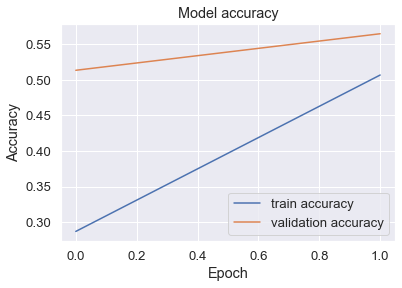

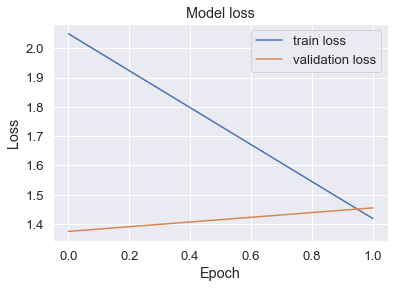

In [42]:
plot_accuracy(H2)
plot_loss(H2)

In [43]:
validation_datagen = image.ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_directory(
    BASE_DIR + '\\validation',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 3000 images belonging to 15 classes.


<ipython-input-43-49d421b2fb27>:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(validation_generator)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

#### Test

In [44]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0, rotation_range=10,width_shift_range=0.2) # Normalise the data
test_image_generator = test_gen.flow_from_directory(BASE_DIR+"\\test",target_size=(Hg, Lng),batch_size=1,class_mode='categorical',shuffle=False)

Found 3000 images belonging to 15 classes.


In [45]:
filenames = test_image_generator.filenames
nb_samples = len(filenames)
predict = model.predict_generator(test_image_generator,steps = nb_samples)
predicted_classes = np.argmax(predict, axis=1)
true_classes = test_image_generator.classes
class_labels = list(test_image_generator.class_indices.keys()) 

<ipython-input-45-cc518796bf3f>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_image_generator,steps = nb_samples)


In [46]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  


              precision    recall  f1-score   support

        Bean       0.05      0.36      0.09       200
Bitter_Gourd       0.00      0.00      0.00       200
Bottle_Gourd       0.00      0.00      0.00       200
     Brinjal       0.00      0.00      0.00       200
    Broccoli       0.00      0.00      0.00       200
     Cabbage       0.06      0.34      0.10       200
    Capsicum       0.00      0.00      0.00       200
      Carrot       0.00      0.00      0.00       200
 Cauliflower       0.00      0.00      0.00       200
    Cucumber       0.00      0.00      0.00       200
      Papaya       0.14      0.24      0.18       200
      Potato       0.09      0.01      0.01       200
     Pumpkin       0.00      0.00      0.00       200
      Radish       0.00      0.00      0.00       200
      Tomato       0.00      0.00      0.00       200

    accuracy                           0.06      3000
   macro avg       0.02      0.06      0.03      3000
weighted avg       0.02   

c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="turbo"
    cm_plot_labels = [i for i in range(15)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap, xticklabels = class_labels, 
            yticklabels = class_labels) # font size
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

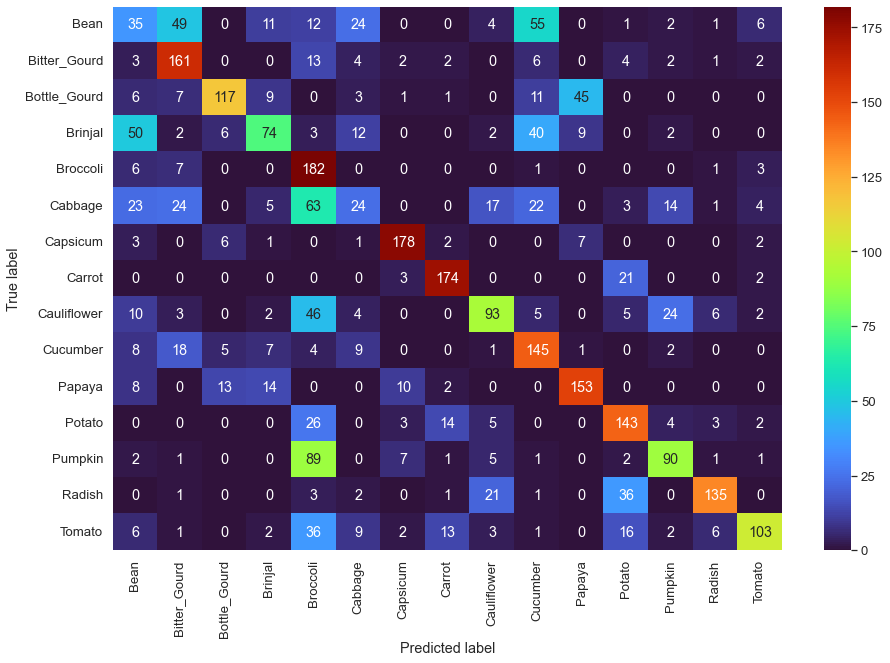

In [38]:
print_confusion_matrix(true_classes,predicted_classes)